## Exemplo Perceptron

#### Funções para Desenhar Superfície de Decisão

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_model(clf):
    fig, ax = plt.subplots()
    # title for the plots
    title = ('Superfície de Decisão')
    # Set-up grid for plotting.
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_title(title)
    plt.show()

#### Gerar Dataset XOR

In [1]:
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

np.random.seed(1000)

nb_samples = 1000
nsb = int(nb_samples / 4)
X = np.zeros((nb_samples, 2))
Y = np.zeros((nb_samples, ))

X[0:nsb, :] = np.random.multivariate_normal([1.0, -1.0], np.diag([0.1, 0.1]), size=nsb)
Y[0:nsb] = 0.0

X[nsb:(2 * nsb), :] = np.random.multivariate_normal([1.0, 1.0], np.diag([0.1, 0.1]), size=nsb)
Y[nsb:(2 * nsb)] = 1.0

X[(2 * nsb):(3 * nsb), :] = np.random.multivariate_normal([-1.0, 1.0], np.diag([0.1, 0.1]), size=nsb)
Y[(2 * nsb):(3 * nsb)] = 0.0

X[(3 * nsb):, :] = np.random.multivariate_normal([-1.0, -1.0], np.diag([0.1, 0.1]), size=nsb)
Y[(3 * nsb):] = 1.0

ss = StandardScaler()
X = ss.fit_transform(X)

X, Y = shuffle(X, Y, random_state=1000)

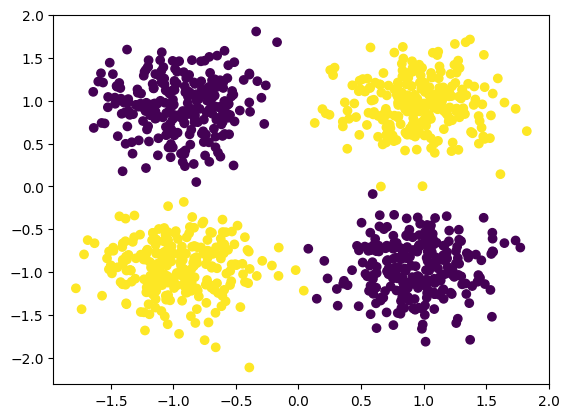

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

#### Calcular Perceptron

In [3]:
import numpy as np

from multiprocessing import cpu_count

from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score

pc = Perceptron(penalty='l2', alpha=0.1, max_iter=1000, n_jobs=cpu_count(), random_state=1000)
print(np.mean(cross_val_score(pc, X, Y, cv=10)))

0.5039999999999999


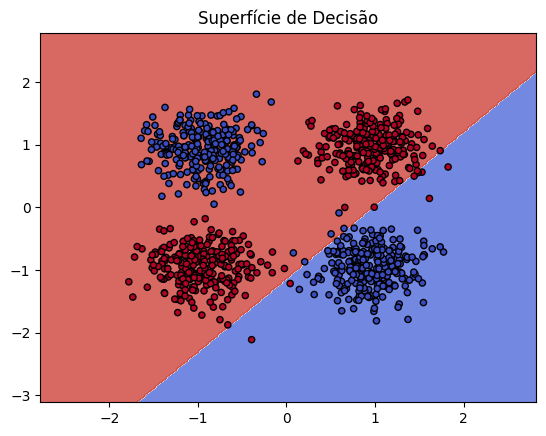

In [5]:
pc.fit(X, Y)
plot_model(pc)

## MLP

####  Define Arquitetura da rede MLP usando ativação Tanh

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import Input

model = Sequential()

model.add(Input(shape=(2,)))
model.add(Dense(4))
model.add(Activation('tanh'))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### Separa Conjuntos Treino / Teste

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1000)

#### Executa Treinamento

In [7]:
from keras.utils import to_categorical
model.fit(X_train, 
          to_categorical(Y_train, num_classes=2), 
          epochs=100, 
          batch_size=32,
          validation_data=(X_test, to_categorical(Y_test, num_classes=2)))

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5443 - loss: 0.7445 - val_accuracy: 0.4800 - val_loss: 0.7798
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5185 - loss: 0.7371 - val_accuracy: 0.4800 - val_loss: 0.7585
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5440 - loss: 0.7087 - val_accuracy: 0.4800 - val_loss: 0.7408
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5279 - loss: 0.7073 - val_accuracy: 0.4800 - val_loss: 0.7251
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5205 - loss: 0.6978 - val_accuracy: 0.4967 - val_loss: 0.7132
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5723 - loss: 0.6812 - val_accuracy: 0.6267 - val_loss: 0.7026
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7161 - loss: 0.6708 - val_accuracy: 0.6733 - val_loss: 0.6923
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7072 - loss: 0.6784 - val_accuracy: 0.6733 - 

#### Realiza Predição a partir do Modelo Treinado

In [8]:
Y_eval_mlp = np.argmax(model.predict(X_test), axis=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


#### Plota resultado do conjunto de Teste

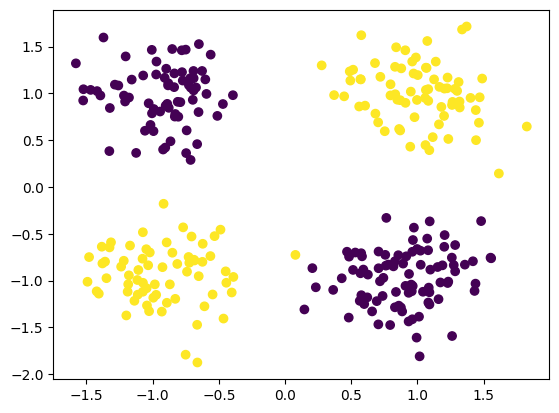

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_eval_mlp)
plt.show()

#### Utiliza Montecarlo para verificar Superfície de Decisão

In [10]:
# Neste exemplo, estamos protando todos os intervalos
import numpy as np

Xm = np.linspace(-2.0, 2.0, 1000)
Ym = np.linspace(-2.0, 2.0, 1000)
Xmg, Ymg = np.meshgrid(Xm, Ym)
X_eval = np.vstack([Xmg.ravel(), Ymg.ravel()]).T

Y_eval_mlp = np.argmax(model.predict(X_eval), axis=1)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 45s 1ms/step


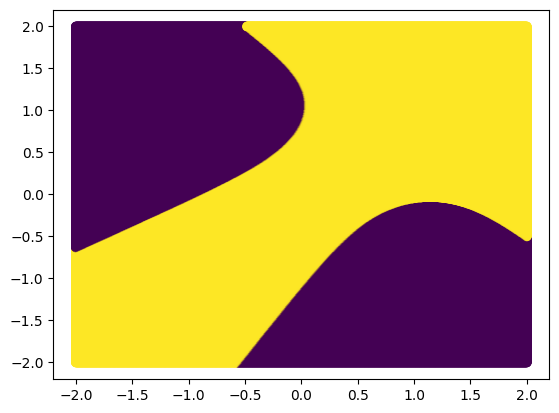

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X_eval[:, 0], X_eval[:, 1], c=Y_eval_mlp)
plt.show()

####  Define Arquitetura da rede MLP usando ativação Relu

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import Input

model = Sequential()

model.add(Input(shape=(2,)))
model.add(Dense(4))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### Executa Treinamento

In [13]:
from keras.utils import to_categorical
model.fit(X_train, 
          to_categorical(Y_train, num_classes=2), 
          epochs=100, 
          batch_size=32,
          validation_data=(X_test, to_categorical(Y_test, num_classes=2)))

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5081 - loss: 1.0835 - val_accuracy: 0.5600 - val_loss: 1.0099
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4849 - loss: 1.0373 - val_accuracy: 0.5500 - val_loss: 0.9408
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5042 - loss: 0.9142 - val_accuracy: 0.5400 - val_loss: 0.8804
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4774 - loss: 0.9224 - val_accuracy: 0.5267 - val_loss: 0.8239
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4824 - loss: 0.8421 - val_accuracy: 0.5167 - val_loss: 0.7756
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4526 - loss: 0.7974 - val_accuracy: 0.5167 - val_loss: 0.7322
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4522 - loss: 0.7831 - val_accuracy: 0.5200 - val_loss: 0.6941
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4578 - loss: 0.7211 - val_accuracy: 0.5300 - 

#### Realiza Predição a partir do Modelo Treinado

In [14]:
Y_eval_mlp = np.argmax(model.predict(X_test), axis=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


#### Plota resultado do conjunto de Teste

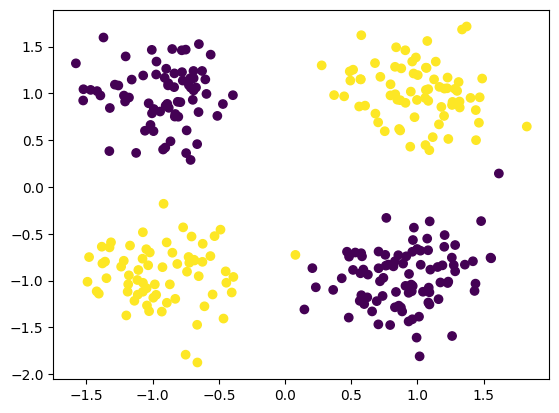

In [15]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_eval_mlp)
plt.show()

In [16]:
import numpy as np

Xm = np.linspace(-2.0, 2.0, 1000)
Ym = np.linspace(-2.0, 2.0, 1000)
Xmg, Ymg = np.meshgrid(Xm, Ym)
X_eval = np.vstack([Xmg.ravel(), Ymg.ravel()]).T

Y_eval_mlp = np.argmax(model.predict(X_eval), axis=1)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 39s 1ms/step


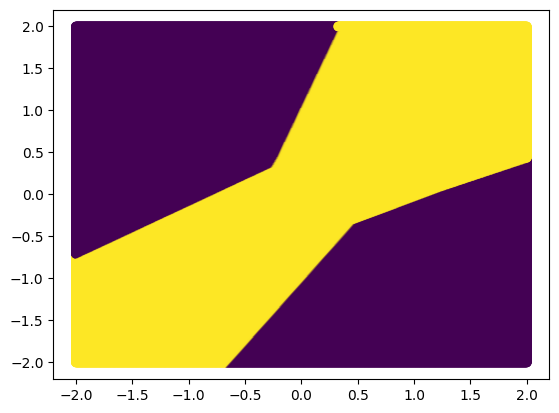

In [17]:
import matplotlib.pyplot as plt
plt.scatter(X_eval[:, 0], X_eval[:, 1], c=Y_eval_mlp)
plt.show()

## Exemplo de Dropout

#### Separa conjuntos de treinamento e teste

In [21]:
import numpy as np

from keras.datasets import mnist
from keras.utils import to_categorical

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

width = height = X_train.shape[1]

X_train = X_train.reshape((X_train.shape[0], width * height)).astype(np.float32) / 255.0
X_test = X_test.reshape((X_test.shape[0], width * height)).astype(np.float32) / 255.0

Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

#### Treinamento sem Dropout

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras import Input

model = Sequential()

model.add(Input(shape=(width * height, )))
model.add(Dense(2048))
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001, decay=1e-6),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [30]:
history = model.fit(X_train, Y_train,
                    epochs=5,
                    batch_size=256,
                    validation_data=(X_test, Y_test))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 108ms/step - accuracy: 0.8227 - loss: 0.7692 - val_accuracy: 0.9525 - val_loss: 0.1632
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 113ms/step - accuracy: 0.9586 - loss: 0.1456 - val_accuracy: 0.9666 - val_loss: 0.1089
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 45s 129ms/step - accuracy: 0.9732 - loss: 0.0929 - val_accuracy: 0.9723 - val_loss: 0.0877
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 131ms/step - accuracy: 0.9816 - loss: 0.0653 - val_accuracy: 0.9772 - val_loss: 0.0732
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 125ms/step - accuracy: 0.9869 - loss: 0.0450 - val_accuracy: 0.9795 - val_loss: 0.0665


#### Treinamento com Dropout

In [31]:
from keras.constraints import MaxNorm
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras import Input

model = Sequential()

model.add(Input(shape=(width * height, )))

model.add(Dropout(0.25, seed=1000))

model.add(Dense(2048, kernel_initializer='uniform', kernel_constraint=MaxNorm(2.0)))
model.add(Activation('relu'))
model.add(Dropout(0.5, seed=1000))

model.add(Dense(1024, kernel_initializer='uniform', kernel_constraint=MaxNorm(2.0)))
model.add(Activation('relu'))
model.add(Dropout(0.5, seed=1000))

model.add(Dense(1024, kernel_initializer='uniform', kernel_constraint=MaxNorm(2.0)))
model.add(Activation('relu'))
model.add(Dropout(0.5, seed=1000))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer=SGD(learning_rate=0.1, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
history = model.fit(X_train, Y_train,
                    epochs=5,
                    batch_size=256,
                    validation_data=(X_test, Y_test))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 127ms/step - accuracy: 0.7065 - loss: 0.8701 - val_accuracy: 0.9552 - val_loss: 0.1525
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 114ms/step - accuracy: 0.9246 - loss: 0.2388 - val_accuracy: 0.9668 - val_loss: 0.1064
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 114ms/step - accuracy: 0.9399 - loss: 0.1927 - val_accuracy: 0.9692 - val_loss: 0.1025
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 118ms/step - accuracy: 0.9477 - loss: 0.1672 - val_accuracy: 0.9726 - val_loss: 0.0885
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 123ms/step - accuracy: 0.9549 - loss: 0.1457 - val_accuracy: 0.9722 - val_loss: 0.0873


## Exemplo de Normalização de lote
#### (Batch Normalization)

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization
from keras.optimizers import Adam
from keras import Input

model = Sequential()

model.add(Input(shape=(width * height, )))
model.add(Dense(2048))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation('softmax'))

model.compile(optimizer=Adam(learning_rate=0.001, decay=1e-6),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
history = model.fit(X_train, Y_train,
                    epochs=5,
                    batch_size=256,
                    validation_data=(X_test, Y_test))


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 38s 149ms/step - accuracy: 0.9159 - loss: 0.5448 - val_accuracy: 0.9760 - val_loss: 0.3850
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 53s 201ms/step - accuracy: 0.9852 - loss: 0.2179 - val_accuracy: 0.9806 - val_loss: 0.2123
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 83s 206ms/step - accuracy: 0.9915 - loss: 0.1370 - val_accuracy: 0.9781 - val_loss: 0.1559
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 174ms/step - accuracy: 0.9946 - loss: 0.0945 - val_accuracy: 0.9791 - val_loss: 0.1264
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 34s 146ms/step - accuracy: 0.9951 - loss: 0.0721 - val_accuracy: 0.9853 - val_loss: 0.1004
